In [1]:
from pacti.iocontract import *
from pacti.terms.polyhedra import *
import matplotlib.pyplot as plt

InVars: [t0, v0]
OutVars:[t1, v1]
A: [
  -t0 <= -0.0
  t0 <= 10.0
  -v0 <= -19000.0
  v0 <= 21000.0
]
G: [
  t0 - t1 <= -230.0
  -t0 + t1 <= 250.0
  -v0 + v1 <= -19550.0
  v0 - v1 <= 19600.0
]


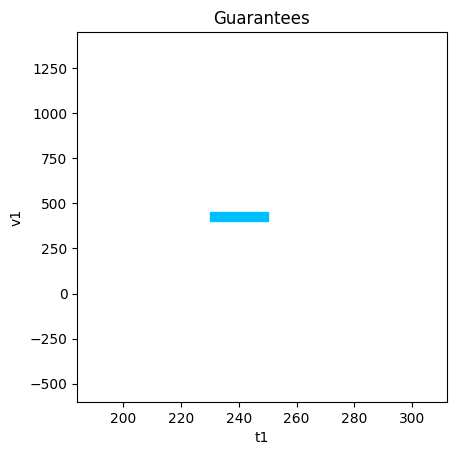

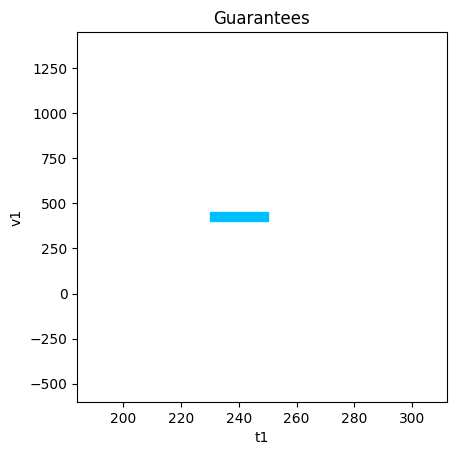

In [2]:
atmospheric_v_entry_min = 19000.0
atmospheric_v_entry_nominal = 20000.0
atmospheric_v_entry_max = 21000.0
atmospheric_t_entry_min = 0.0
atmospheric_t_entry_nominal = 0.0
atmospheric_t_entry_max = 10.0

atmospheric_delta_t_exit_min = 230
atmospheric_delta_t_exit_max = 250

atmospheric_delta_v_exit_min = 19550
atmospheric_delta_v_exit_max = 19600


atmospheric_entry_contract = PolyhedralContract.from_string(
    input_vars=[
      "t0",           # time @ entry
      "v0"            # velocity @ entry
    ],
    output_vars=[
      "t1",           # time @ exit
      "v1",           # velocity @ exit
    ],
    assumptions=[
      # atmospheric_t_entry_min <= t0 <= atmospheric_t_entry_max
      f"-t0 <= -{atmospheric_t_entry_min}",
      f"t0 <= {atmospheric_t_entry_max}",

      # atmospheric_v_entry_min <= velocity @ entry <= atmospheric_v_entry_max
      f"-v0 <= -{atmospheric_v_entry_min}",
      f"v0 <= {atmospheric_v_entry_max}",
    ],
    guarantees=[
      # atmospheric_delta_t_exit_min <= t1 - t0 <= atmospheric_delta_t_exit_max
      f"-t1 + t0 <= -{atmospheric_delta_t_exit_min}",
      f"t1 - t0 <= {atmospheric_delta_t_exit_max}",

      # atmospheric_delta_v_exit_min <= v0 - v1 <= atmospheric_delta_v_exit_max
      f"v1 - v0 <= -{atmospheric_delta_v_exit_min}",
      f"-v1 + v0 <= {atmospheric_delta_v_exit_max}",
    ])
print(atmospheric_entry_contract)

plot_guarantees(
    contract=atmospheric_entry_contract,
    x_var=Var("t1"),
    y_var=Var("v1"),
    var_values={
        Var("t0"):atmospheric_t_entry_nominal,
        Var("v0"):atmospheric_v_entry_nominal
    },
    x_lims=(
      (atmospheric_t_entry_min + atmospheric_delta_t_exit_min)*0.8,
      (atmospheric_t_entry_max + atmospheric_delta_t_exit_max)*1.2),
    y_lims=(
      (atmospheric_v_entry_min - atmospheric_delta_v_exit_max), 
      (atmospheric_v_entry_max - atmospheric_delta_v_exit_min))
)